In [96]:
# mac475의 ipython 표준 style을 적용함
from IPython.core.display import HTML
styles = open( './styles/custom.css', 'r' ).read()
HTML( styles )

#1. dataset에 대한 기본적 탐색

In [97]:
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()

In [98]:
df_store = pd.read_csv( filepath_or_buffer = './dataset/store.csv' )    # store data
df_train = pd.read_csv( filepath_or_buffer ='./dataset/train.csv', dtype = { 'StateHoliday' : str } )    # train data

In [99]:
df_store.info()    # df_store에 대한 briefing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB


In [100]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


* 일부 store feature들에 대한 누락 존재

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB


In [102]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [103]:
df_train.count()

Store            1017209
DayOfWeek        1017209
Date             1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [104]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000,1017209.000000
mean,558.429727,3.998341,5773.818972,633.145946,0.830107,0.381515,0.178647
std,321.908651,1.997391,3849.926175,464.411734,0.375539,0.485759,0.383056
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3727.000000,405.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5744.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7856.000000,837.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


###요약1 : store의 경우 competition 계열, promotion 계열 feature들의 누락발생
###요약2 : train의 경우 누락없음

#2. store dataset

In [105]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [106]:
df_store[ df_store[ 'CompetitionDistance' ].isnull() ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5,2013,"Feb,May,Aug,Nov"


In [122]:
df_store[ 'CompetitionDistance' ].mean(), df_store[ 'CompetitionDistance' ].median()

(5404.9010791366909, 2325.0)

In [128]:
df_store.groupby( [ 'StoreType', 'Assortment' ] )[ 'CompetitionDistance' ].mean(), df_store.groupby( [ 'StoreType', 'Assortment' ] )[ 'CompetitionDistance' ].median()

(StoreType  Assortment
 a          a             4058.661417
            c             6966.409091
 b          a              888.571429
            b             1177.777778
            c             1210.000000
 c          a             2710.519481
            c             4403.239437
 d          a             6661.269841
            c             7057.272727
 Name: CompetitionDistance, dtype: float64, StoreType  Assortment
 a          a             1560
            c             2320
 b          a             1180
            b              860
            c             1210
 c          a             1270
            c             2100
 d          a             4385
            c             5345
 Name: CompetitionDistance, dtype: float64)

In [129]:
df_store.groupby( [ 'StoreType', 'Assortment' ] )[ 'CompetitionOpenSinceMonth' ].mean()

StoreType  Assortment
a          a             7.338983
           c             6.824427
b          a             6.333333
           b             7.333333
           c                  NaN
c          a             7.053571
           c             7.098039
d          a             6.975309
           c             7.659420
Name: CompetitionOpenSinceMonth, dtype: float64

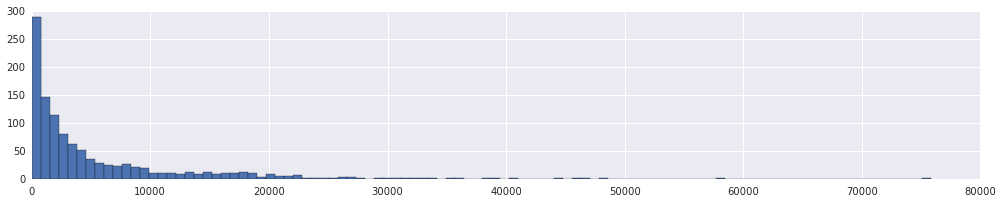

In [120]:
_ = df_store[ 'CompetitionDistance' ].hist( bins = 100, figsize = (17,3) )

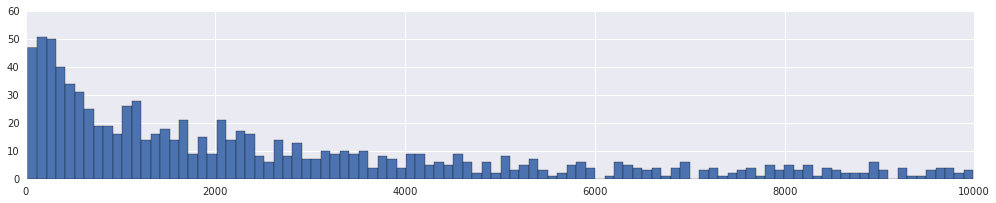

In [121]:
_ = df_store[ 'CompetitionDistance' ][ df_store[ 'CompetitionDistance' ] < 10000 ].hist( bins = 100, figsize = (17,3) )

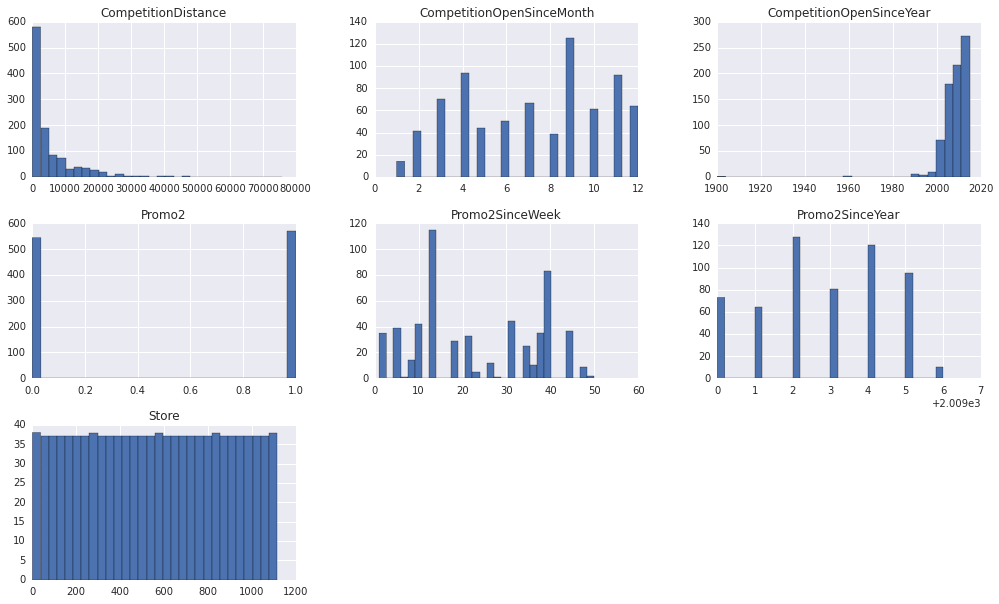

In [117]:
_ = df_store.hist(  bins = 30, figsize = (17,10) )